<a href="https://colab.research.google.com/github/anshupandey/MSA-analytics/blob/main/Lab6_Ocean_Hull_Portfolio_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ocean Hull Insurance Portfolio Monitoring and Optimization

This notebook demonstrates:

1. Portfolio Monitoring
2. Factor Risk Analysis
3. Risk Modeling (VaR and CVaR)
4. Mean-Variance Optimization

We use the provided Ocean Hull insurance dataset.

---

## Step 1: Load Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/Ocean Hull Data for Bee-Relevant - Anonymised.xlsx")
df.shape

(20422, 32)

In [3]:
df.head()

,Dummy_Policy_Reference,Dummy_Vessel_Reference,YearOfAccount,PolicyPremium,ExposureYears,Entity,AggregateDeductible_USD,HM_GrossAchievedPremium_polccy,HM_Coverage,HM_AdditionalMachineryDeductible_USD,...,VesselFlag,TradingZone,TradingArea,VesselClass,VesselPIClub,DeductibleUSDPerSelectedTonnage,IMOFlag,AggregateDeductibleFlag,ClaimCount,ClaimIncurred
0,1781,1,2020,45657.73,1.0,MSAM,NaN,NaN,RISKSEXCCOLLLIABS,NaN,...,Palau,NaN,WorldWide,0,Unknown,35.714286,Yes,NO,0,0.0000
1,1780,1,2021,9833.95,1.0,MSAM,NaN,NaN,RISKSEXCCOLLLIABS,NaN,...,Palau,NaN,WorldWide,0,Unknown,35.714286,Yes,NO,0,0.0000
2,1779,1,2021,7525.32,1.0,MSAM,NaN,NaN,RISKSEXCLIABS,NaN,...,NaN,Local,Local,XX,XX,20.054437,No,NO,0,0.0000
3,1778,1,2021,1256.67,1.0,MSAM,NaN,NaN,ALLRISKS,NaN,...,NaN,Local,Local,XX,XX,NaN,No,NO,1,48430.1296
4,1778,2,2021,1256.67,1.0,MSAM,NaN,NaN,ALLRISKS,NaN,...,NaN,Local,Local,XX,XX,NaN,No,NO,0,0.0000


In [5]:
df.head().T

,0,1,2,3,4
Dummy_Policy_Reference,1781,1780,1779,1778,1778
Dummy_Vessel_Reference,1,1,1,1,2
YearOfAccount,2020,2021,2021,2021,2021
PolicyPremium,45657.73,9833.95,7525.32,1256.67,1256.67
ExposureYears,1.0,1.0,1.0,1.0,1.0
Entity,MSAM,MSAM,MSAM,MSAM,MSAM
AggregateDeductible_USD,NaN,NaN,NaN,NaN,NaN
HM_GrossAchievedPremium_polccy,NaN,NaN,NaN,NaN,NaN
HM_Coverage,RISKSEXCCOLLLIABS,RISKSEXCCOLLLIABS,RISKSEXCLIABS,ALLRISKS,ALLRISKS
HM_AdditionalMachineryDeductible_USD,NaN,NaN,NaN,NaN,NaN


In [6]:

# Convert important columns
df['ClaimIncurred'] = pd.to_numeric(df['ClaimIncurred'], errors='coerce').fillna(0)
df['PolicyPremium'] = pd.to_numeric(df['PolicyPremium'], errors='coerce').fillna(0)
df['ExposureYears'] = pd.to_numeric(df['ExposureYears'], errors='coerce').fillna(1)

df['LossRatio'] = df['ClaimIncurred'] / df['PolicyPremium']
df['ClaimFrequency'] = df['ClaimCount'].astype(int) / df['ExposureYears']
df['ProfitOrLoss'] = df['PolicyPremium'] - df['ClaimIncurred']

df['LossRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['LossRatio'].fillna(0, inplace=True)

df.head()


<ipython-input-6-3160848115>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LossRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-6-3160848115>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,Dummy_Policy_Reference,Dummy_Vessel_Reference,YearOfAccount,PolicyPremium,ExposureYears,Entity,AggregateDeductible_USD,HM_GrossAchievedPremium_polccy,HM_Coverage,HM_AdditionalMachineryDeductible_USD,...,VesselClass,VesselPIClub,DeductibleUSDPerSelectedTonnage,IMOFlag,AggregateDeductibleFlag,ClaimCount,ClaimIncurred,LossRatio,ClaimFrequency,ProfitOrLoss
0,1781,1,2020,45657.73,1.0,MSAM,NaN,NaN,RISKSEXCCOLLLIABS,NaN,...,0,Unknown,35.714286,Yes,NO,0,0.0000,0.000000,0.0,45657.7300
1,1780,1,2021,9833.95,1.0,MSAM,NaN,NaN,RISKSEXCCOLLLIABS,NaN,...,0,Unknown,35.714286,Yes,NO,0,0.0000,0.000000,0.0,9833.9500
2,1779,1,2021,7525.32,1.0,MSAM,NaN,NaN,RISKSEXCLIABS,NaN,...,XX,XX,20.054437,No,NO,0,0.0000,0.000000,0.0,7525.3200
3,1778,1,2021,1256.67,1.0,MSAM,NaN,NaN,ALLRISKS,NaN,...,XX,XX,NaN,No,NO,1,48430.1296,38.538462,1.0,-47173.4596
4,1778,2,2021,1256.67,1.0,MSAM,NaN,NaN,ALLRISKS,NaN,...,XX,XX,NaN,No,NO,0,0.0000,0.000000,0.0,1256.6700


## Step 2: Portfolio Monitoring

We assess:
- Total Premium and Claim per Year
- Average Loss Ratio
- Claim Frequency


In [7]:
df['HighLossAlert'] = df['LossRatio'] > 1.0
df['ClaimSpikeAlert'] = df['ClaimIncurred'] > df['ClaimIncurred'].quantile(0.95)


In [8]:
trend = df.groupby('YearOfAccount').agg(
    TotalClaims=('ClaimIncurred', 'sum'),
    TotalPremium=('PolicyPremium', 'sum'),
    AvgLossRatio=('LossRatio', 'mean'),
    ClaimFrequency=('ClaimCount', 'sum')
).reset_index()
trend


,YearOfAccount,TotalClaims,TotalPremium,AvgLossRatio,ClaimFrequency
0,2016,5.678167e+07,1.468207e+09,0.407191,367
1,2017,6.778946e+07,1.273158e+09,0.651550,366
2,2018,6.829722e+07,1.734442e+09,0.430207,396
3,2019,6.503912e+07,1.654973e+09,0.316138,391
4,2020,6.472396e+07,1.590500e+09,0.422358,330
5,2021,6.251853e+07,1.732193e+09,0.265560,340
6,2022,7.836559e+07,6.534992e+08,0.322700,223
7,2023,1.212228e+07,6.355227e+08,0.196038,81


## Step 3: Factor Risk Analysis

We check which `VesselClass`, `VesselFlag`, or `TradingZone` are contributing most to the risk.


In [ ]:

factors = ['VesselClass', 'TradingZone', 'VesselFlag', 'IMOFlag', 'HM_Coverage', 'AggregateDeductibleFlag']
factor_analysis = []

for factor in factors:
    if factor in df.columns:
        summary = df.groupby(factor).agg(
            AvgClaimIncurred=('ClaimIncurred', 'mean'),
            AvgLossRatio=('LossRatio', 'mean'),
            PolicyCount=('Dummy_Policy_Reference', 'count')
        ).reset_index()
        summary['Factor'] = factor
        summary.rename(columns={factor: 'Category'}, inplace=True)
        factor_analysis.append(summary)

factor_summary = pd.concat(factor_analysis, ignore_index=True)
factor_summary.head(10)


<ipython-input-10-1957776265>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='ClaimIncurred', estimator=np.mean, ci=None)


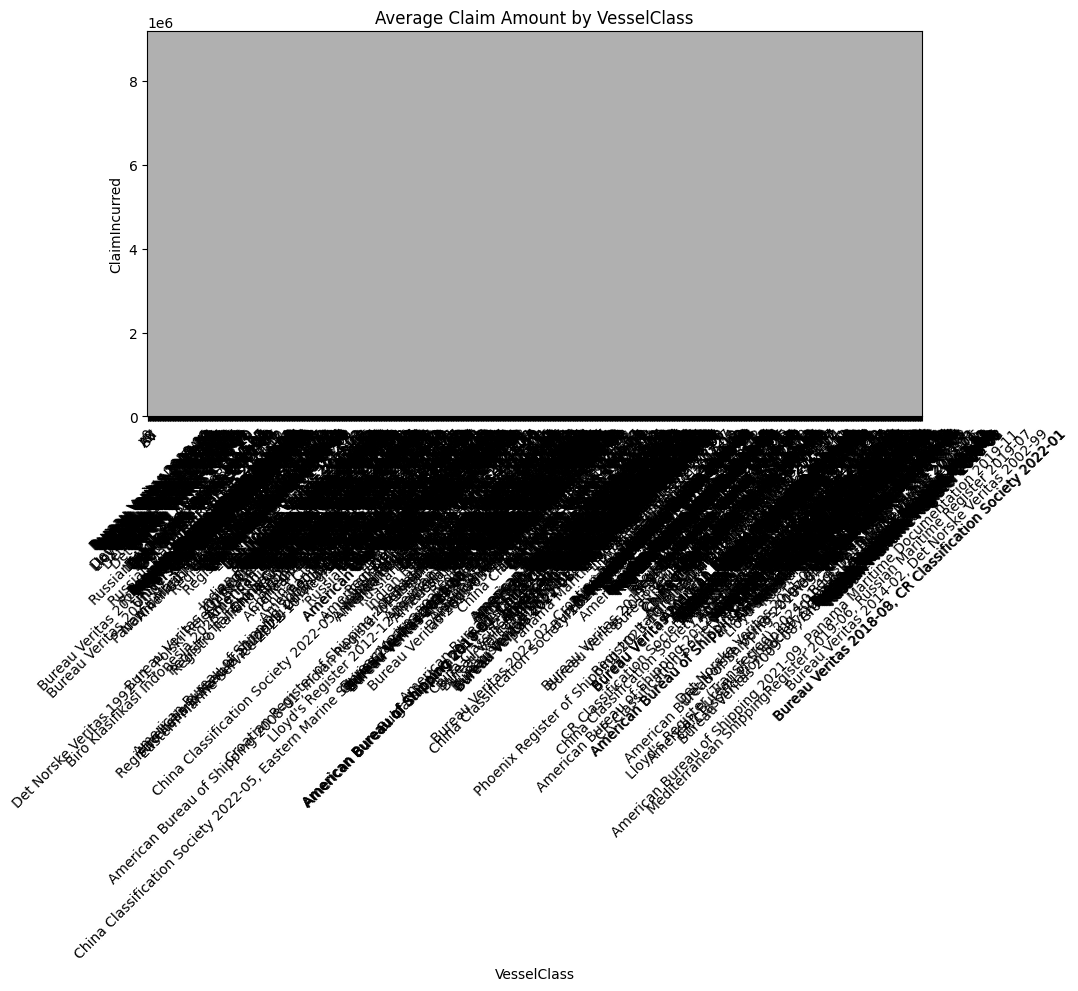

<ipython-input-10-1957776265>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='ClaimIncurred', estimator=np.mean, ci=None)


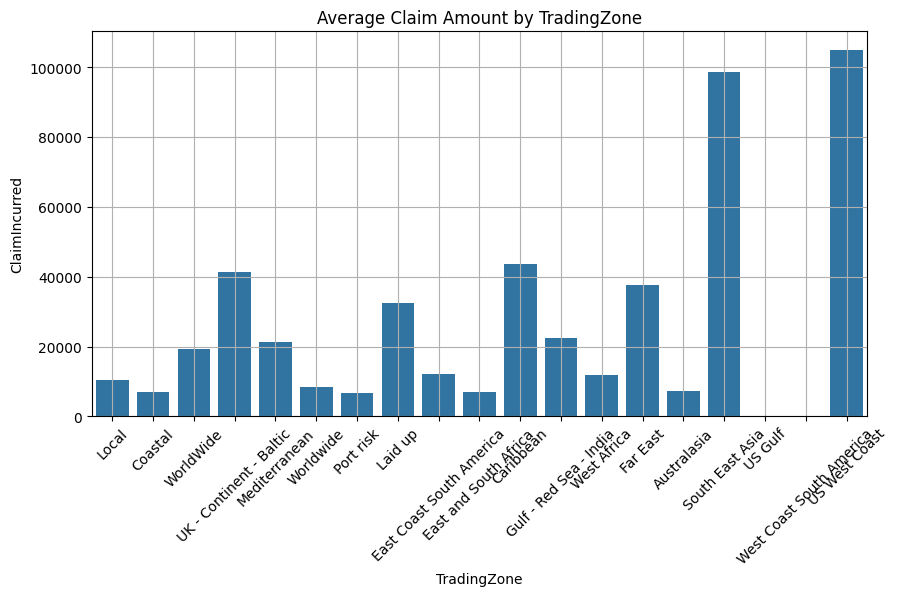

<ipython-input-10-1957776265>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='ClaimIncurred', estimator=np.mean, ci=None)


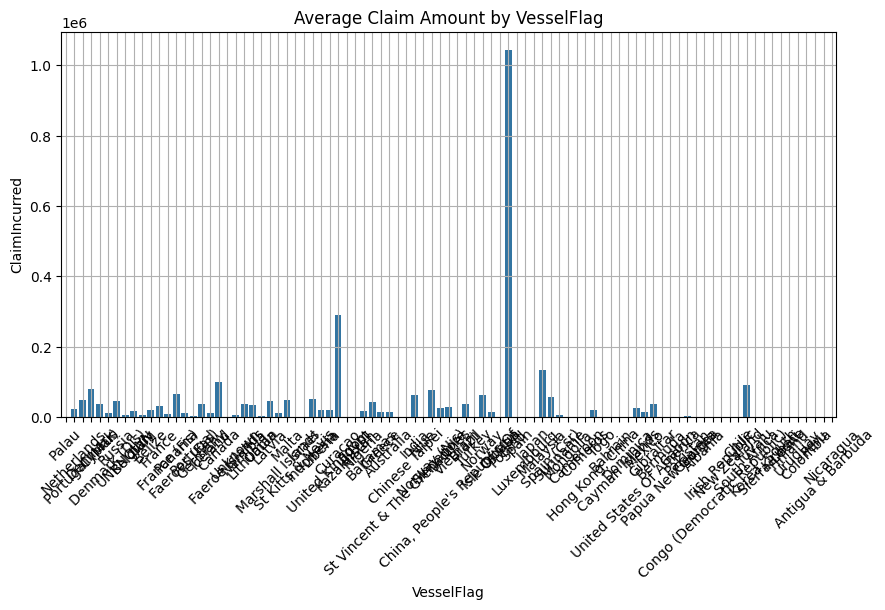

<ipython-input-10-1957776265>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='ClaimIncurred', estimator=np.mean, ci=None)


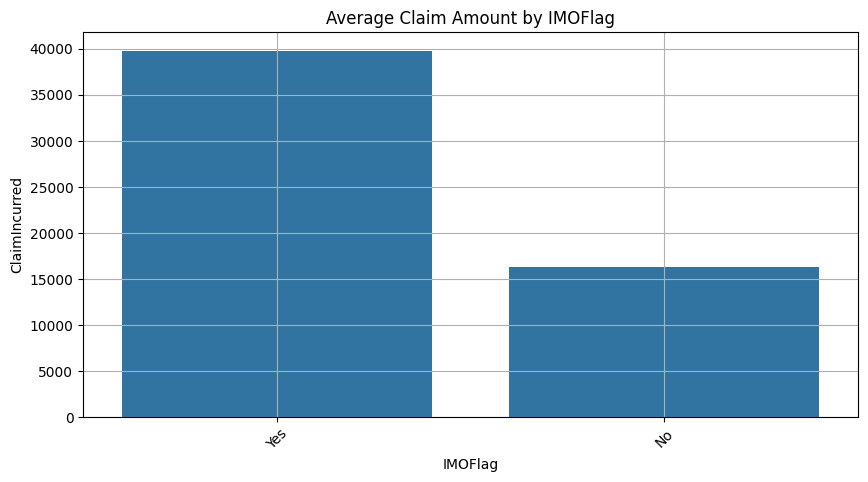

<ipython-input-10-1957776265>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='ClaimIncurred', estimator=np.mean, ci=None)


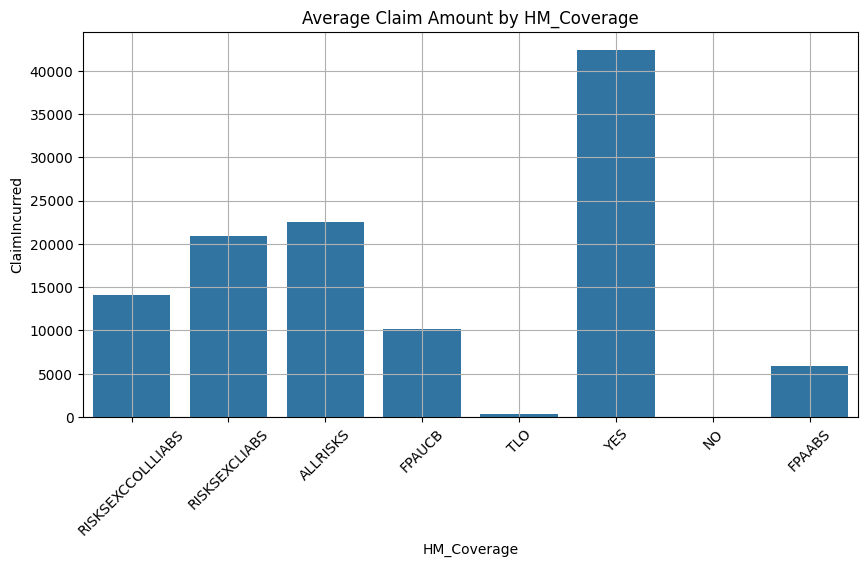

<ipython-input-10-1957776265>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='ClaimIncurred', estimator=np.mean, ci=None)


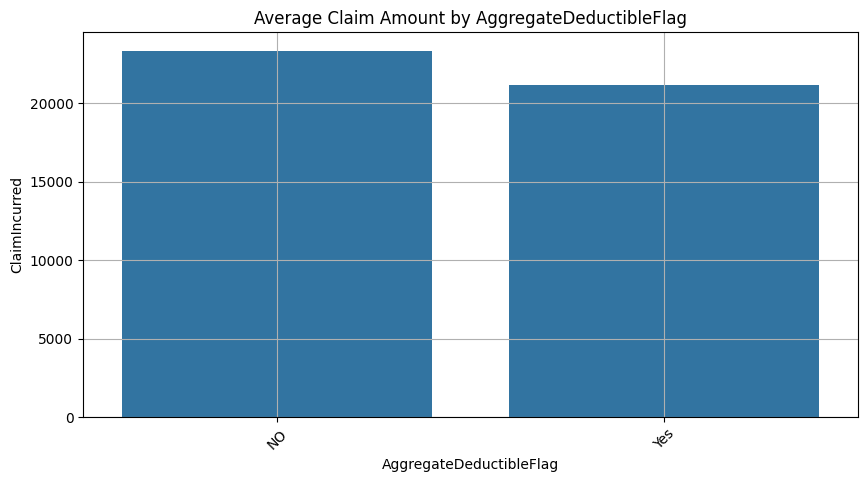

In [10]:

# Grouping and visualization
factors = ['VesselClass', 'TradingZone', 'VesselFlag', 'IMOFlag', 'HM_Coverage', 'AggregateDeductibleFlag']

for factor in factors:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x=factor, y='ClaimIncurred', estimator=np.mean, ci=None)
    plt.title(f'Average Claim Amount by {factor}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [12]:
df.groupby(['VesselFlag'])['ClaimIncurred'].mean().sort_values(ascending=False).head(10)

,ClaimIncurred
VesselFlag,
Poland,1.043247e+06
Curacao,2.891908e+05
Malaysia,1.324163e+05
Canada,1.004846e+05
South Africa,8.943611e+04
Denmark,7.844783e+04
Norway (Nis),7.650950e+04
Panama,6.385492e+04
Norway,6.330733e+04


## Step 4: Risk Modeling (VaR and CVaR)

We calculate 95% Value-at-Risk and Conditional Value-at-Risk from ClaimIncurred.


In [ ]:

claims = df['ClaimIncurred']
claims = claims[claims > 0].sort_values().reset_index(drop=True)

alpha = 0.95
n = len(claims)
index_var = int((1 - alpha) * n)

VaR_95 = claims.iloc[index_var]
CVaR_95 = claims.iloc[:index_var].mean()

pd.DataFrame({'Metric': ['VaR at 95%', 'CVaR at 95%'], 'Value': [VaR_95, CVaR_95]})


,Metric,Value
0,VaR at 95%,1047.440965
1,CVaR at 95%,688.482271


## Step 5: Mean-Variance Optimization

We simulate portfolio weights across Vessel Classes based on average returns and volatility.


In [ ]:

portfolio = df.groupby('VesselClass').agg(
    AvgReturn=('ProfitOrLoss', 'mean'),
    StdDev=('ProfitOrLoss', 'std'),
    Count=('Dummy_Policy_Reference', 'count')
).reset_index()

portfolio = portfolio[portfolio['Count'] >= 5]
portfolio['SharpeRatio'] = portfolio['AvgReturn'] / portfolio['StdDev']
portfolio['Weight'] = portfolio['SharpeRatio'].clip(lower=0)
portfolio['Weight'] = portfolio['Weight'] / portfolio['Weight'].sum()

portfolio[['VesselClass', 'AvgReturn', 'StdDev', 'SharpeRatio', 'Weight']].sort_values(by='Weight', ascending=False)


,VesselClass,AvgReturn,StdDev,SharpeRatio,Weight
167,Bureau Veritas 2002-01,1.873046e+06,9.474442e+04,19.769458,0.018973
97,"Bulgarski Koraben Registar 2020-03, Bureau Ver...",1.872845e+06,9.502432e+04,19.709108,0.018915
806,Lloyd's Register 2011-01-14,2.300780e+05,1.415129e+04,16.258451,0.015603
898,Lloyd's Register 2019-06-14,2.300780e+05,1.415129e+04,16.258451,0.015603
681,Lloyd's Register 1982-02-12,1.857124e+06,1.185620e+05,15.663730,0.015032
...,...,...,...,...,...
359,"Bureau Veritas 2021-06, Det Norske Veritas 201...",-5.072009e+04,1.369784e+05,-0.370278,0.000000
438,Det Norske Veritas 1990-06,-7.566977e+05,1.592662e+06,-0.475115,0.000000
170,Bureau Veritas 2003-00,-2.430222e+05,3.667205e+06,-0.066269,0.000000
123,Bureau Veritas 1990-01,-4.612212e+04,9.407310e+04,-0.490280,0.000000


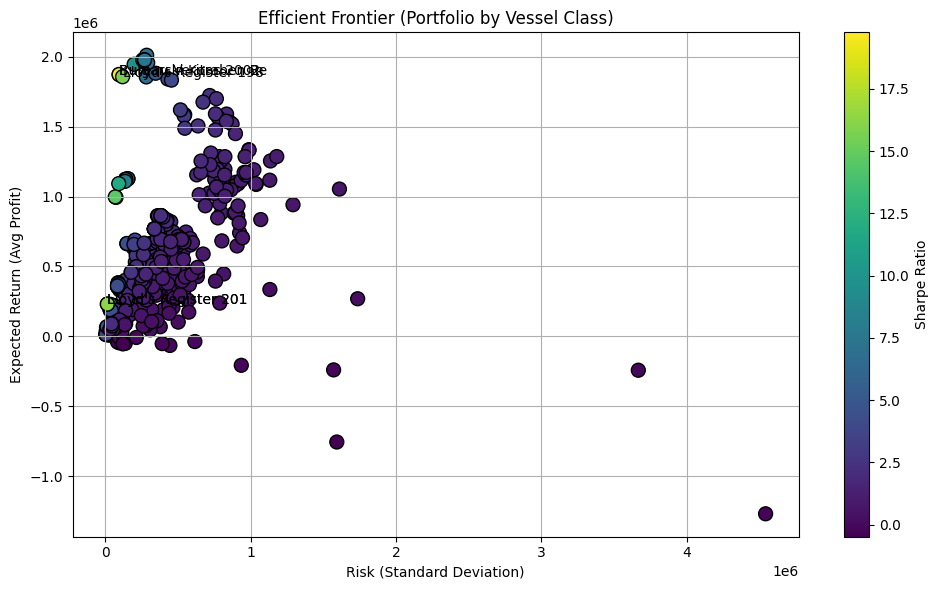

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(portfolio['StdDev'], portfolio['AvgReturn'],
            c=portfolio['SharpeRatio'], cmap='viridis', s=100, edgecolor='k')
plt.colorbar(label='Sharpe Ratio')
for i, txt in enumerate(portfolio['VesselClass']):
    if portfolio['Weight'].iloc[i] > 0.015:
        plt.annotate(txt[:20], (portfolio['StdDev'].iloc[i], portfolio['AvgReturn'].iloc[i]))
plt.title('Efficient Frontier (Portfolio by Vessel Class)')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return (Avg Profit)')
plt.grid(True)
plt.tight_layout()
plt.show()
